# PCA and FA decomposition

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

In [2]:
data_path = Path("~/MBAI/data").expanduser()

In [3]:
current_season_id = "22024"
current_season_path = data_path / f"rs{current_season_id}"

In [4]:
dfs = [
    pd.read_parquet(game_dir / "teams_gamelog.parquet")
        for game_dir in current_season_path.iterdir()
            if game_dir.is_dir() and game_dir.name.startswith('g')
]

In [5]:
df = pd.concat(dfs).reset_index(drop=True)

In [6]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'GAME_ID', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
df = df.drop(columns=['SEASON_ID', 'TEAM_ID', 'GAME_ID'])

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [9]:
pca = PCA()
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

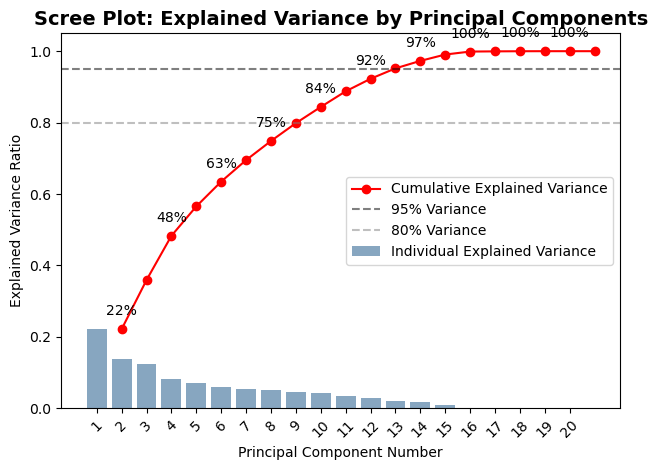

In [24]:
# Create a bar plot for individual variance
sns.barplot(x=np.arange(1, len(pca.explained_variance_ratio_)+1),
            y=pca.explained_variance_ratio_,
            color='steelblue',
            alpha=0.7,
            label='Individual Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Create a line plot for cumulative variance
plt.plot(np.arange(1, len(cumulative_variance)+1),
         cumulative_variance,
         'ro-',
         label='Cumulative Explained Variance')

# Annotate the cumulative values on the line plot
for i, (pc, cum_var) in enumerate(zip(np.arange(1, len(cumulative_variance)+1), cumulative_variance)):
    if i % 2 == 0: # Annotate every other point to avoid clutter
        plt.annotate(f'{cum_var:.0%}', (pc, cum_var), textcoords="offset points", xytext=(0,10), ha='center')

plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5, label='95% Variance')
plt.axhline(y=0.80, color='grey', linestyle='--', alpha=0.5, label='80% Variance')
plt.legend(loc='best')
plt.title('Scree Plot: Explained Variance by Principal Components', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

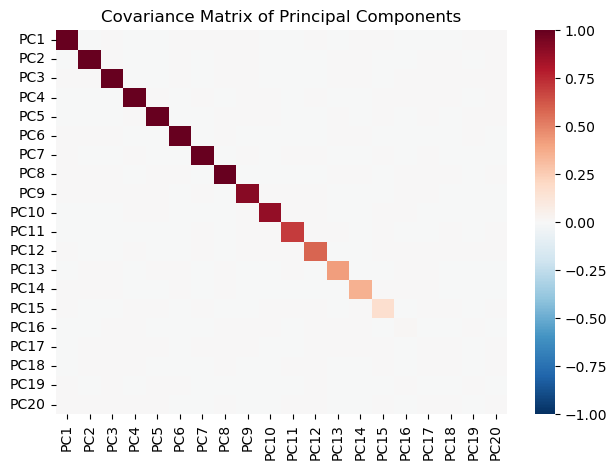

In [13]:
sns.heatmap(pca_df.cov(), 
            annot=False,    
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1)
plt.title('Covariance Matrix of Principal Components')
plt.tight_layout()
plt.show()

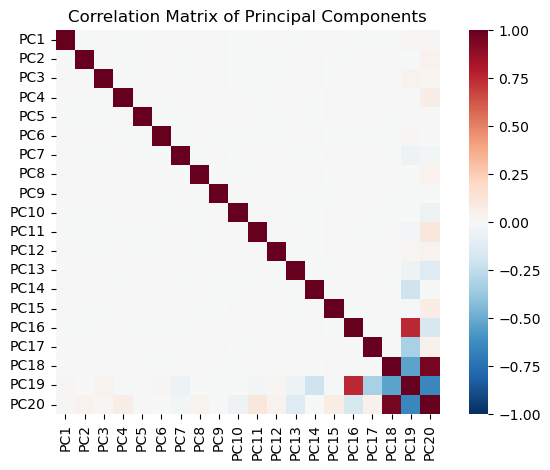

In [12]:
sns.heatmap(pca_df.corr(), 
            annot=False,    
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1,
            square=True)
plt.title('Correlation Matrix of Principal Components')
plt.tight_layout()
plt.show()

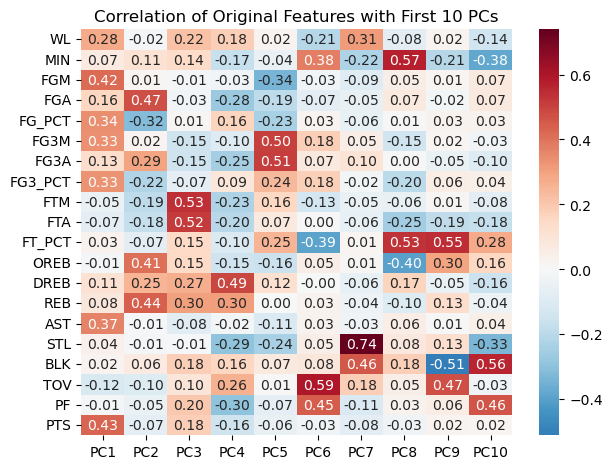

In [25]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, 
                           columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                           index=df.columns)  

max_component = 10
sns.heatmap(loadings_df.iloc[:, :max_component],
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')

plt.title(f'Correlation of Original Features with First {max_component} PCs')
plt.tight_layout()
plt.show()

Number of components with eigenvalue > 1 (Kaiser): 8


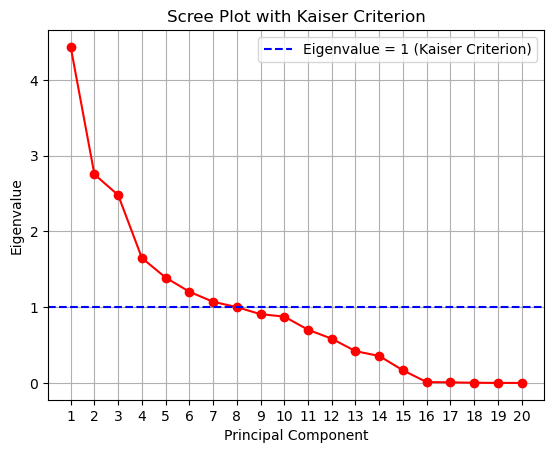

In [23]:
eigenvalues = pca.explained_variance_
n_components_kaiser = sum(eigenvalues > 1)
print(f"Number of components with eigenvalue > 1 (Kaiser): {n_components_kaiser}")

x_values = range(1, len(eigenvalues)+1)
plt.plot(x_values, eigenvalues, 'ro-')
plt.axhline(y=1, color='b', linestyle='--', label='Eigenvalue = 1 (Kaiser Criterion)')
plt.xlabel('Principal Component')
plt.xticks(x_values)
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Kaiser Criterion')
plt.legend()
plt.grid(True)
plt.show()

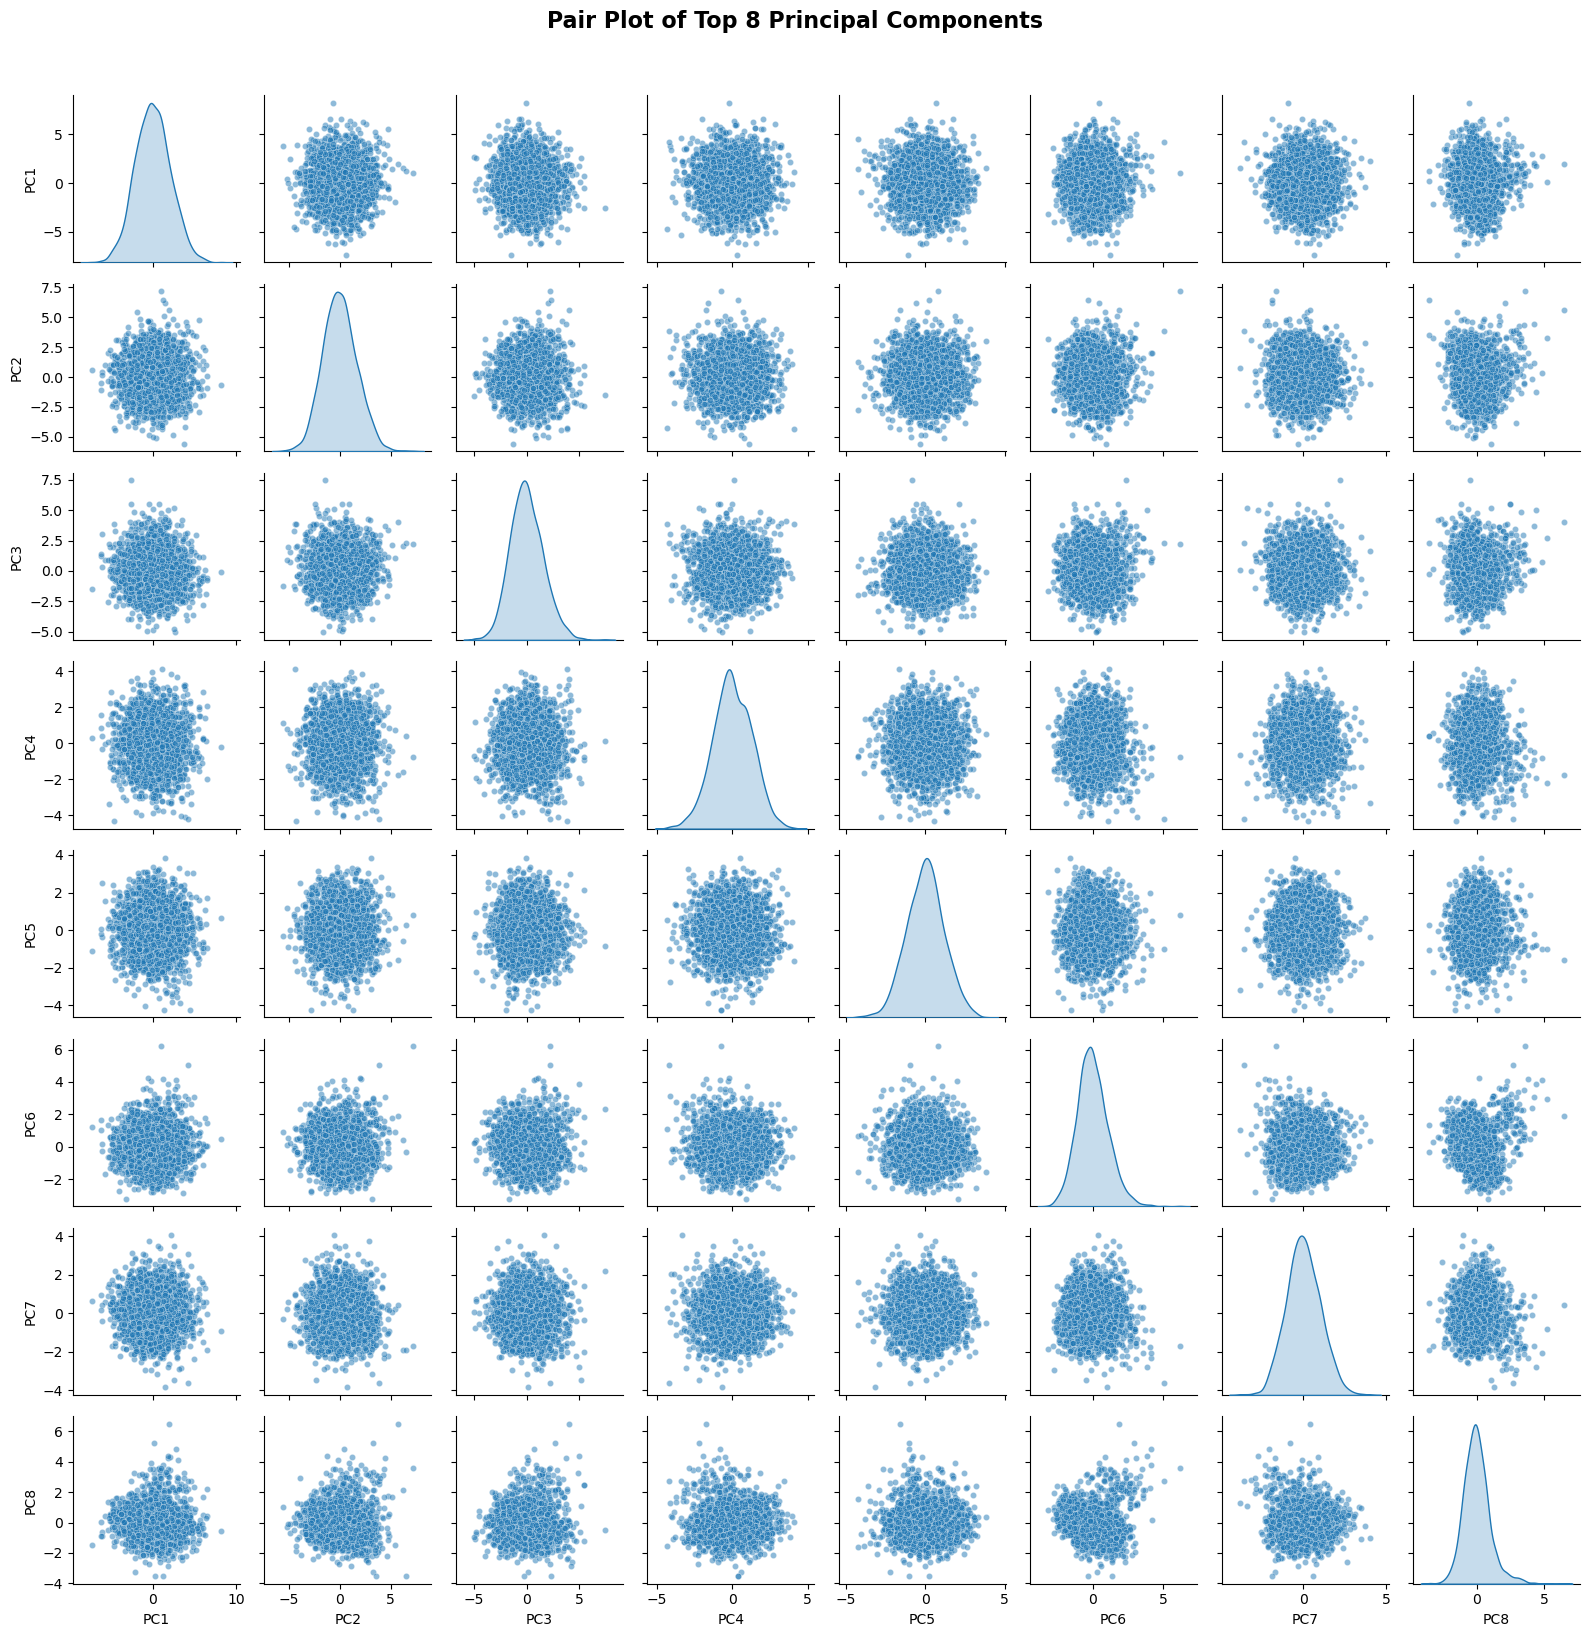

In [21]:
max_component = 8
top_components = [f'PC{idx}' for idx in range(1, max_component + 1)]
g = sns.pairplot(pca_df[top_components],
                 diag_kind='kde', # Use KDE for the diagonal plots
                 plot_kws={'alpha': 0.5, 's': 20},
                 height=2)

g.fig.suptitle(f'Pair Plot of Top {max_component} Principal Components', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
fa = FactorAnalysis()
fa_data = fa.fit_transform(scaled_df)
fa_df = pd.DataFrame(fa_data, columns=[f'F{i+1}' for i in range(fa_data.shape[1])])

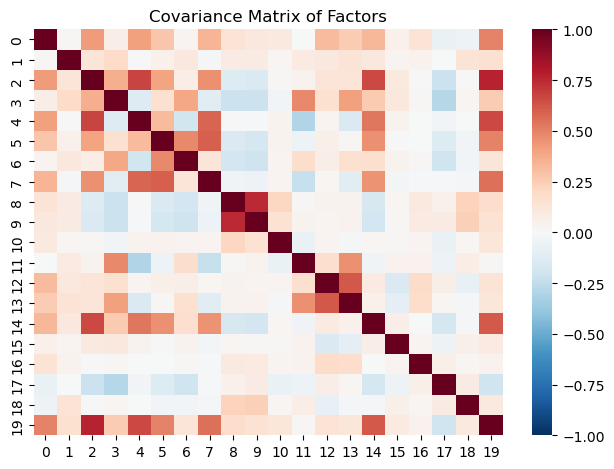

In [32]:
sns.heatmap(fa.get_covariance(), 
            annot=False,    
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1)
plt.title('Covariance Matrix of Factors')
plt.tight_layout()
plt.show()

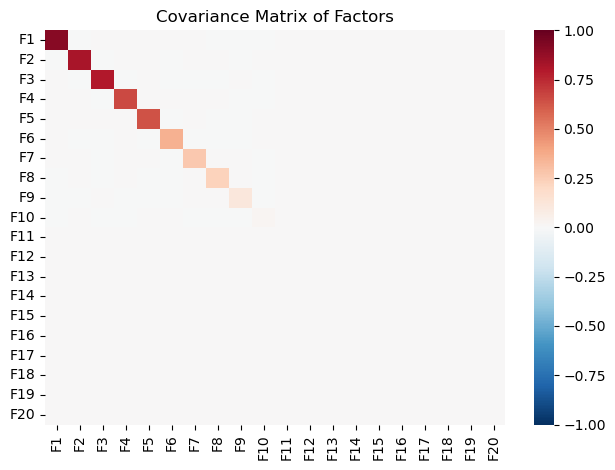

In [35]:
sns.heatmap(fa_df.cov(), 
            annot=False,    
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1)
plt.title('Covariance Matrix of Factors')
plt.tight_layout()
plt.show()

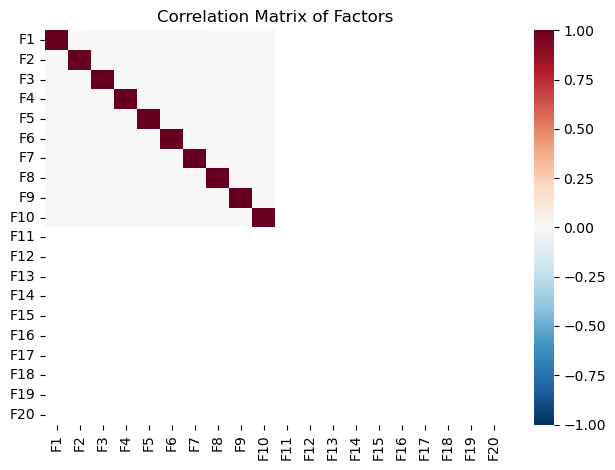

In [34]:
sns.heatmap(fa_df.corr(), 
            annot=False,    
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix of Factors')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Noise Variance')

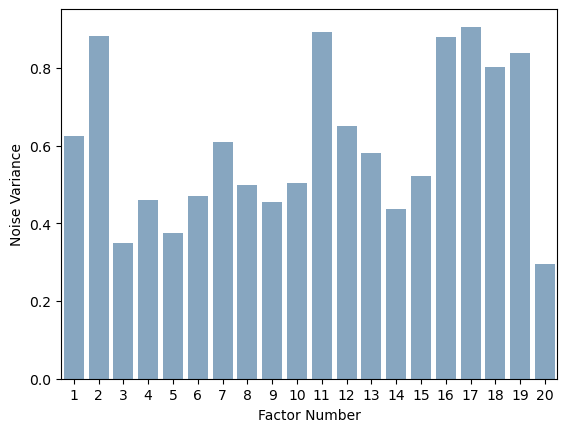

In [28]:
sns.barplot(x=np.arange(1, len(fa.noise_variance_)+1),
            y=fa.noise_variance_,
            color='steelblue',
            alpha=0.7)
plt.xlabel('Factor Number')
plt.ylabel('Noise Variance')

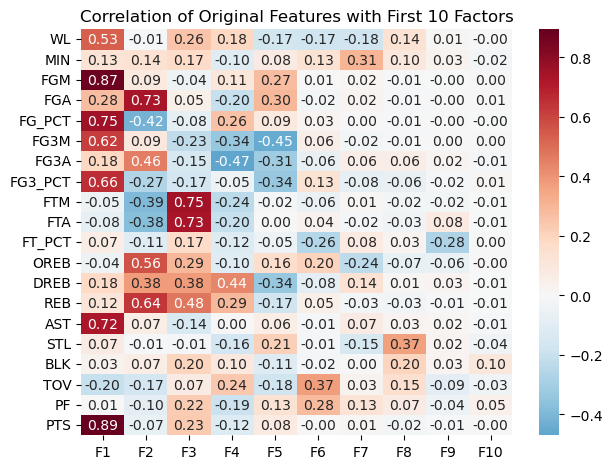

In [30]:
loadings = fa.components_

loadings_df = pd.DataFrame(loadings.T, 
                           columns=[f'F{i+1}' for i in range(loadings.shape[0])],
                           index=df.columns)  

max_component = 10
sns.heatmap(loadings_df.iloc[:, :max_component],
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')

plt.title(f'Correlation of Original Features with First {max_component} Factors')
plt.tight_layout()
plt.show()

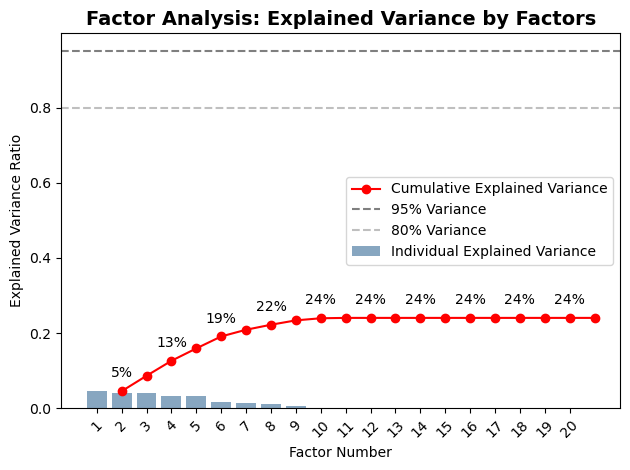

In [31]:
# Calculate proportion of variance explained by factors
total_variance = np.sum(np.var(scaled_df, axis=0))
explained_variance_ratio = [np.var(fa_data[:, i]) / total_variance for i in range(fa_data.shape[1])]

sns.barplot(x=np.arange(1, len(explained_variance_ratio)+1),
            y=explained_variance_ratio,
            color='steelblue',
            alpha=0.7,
            label='Individual Explained Variance')
plt.xlabel('Factor Number')
plt.ylabel('Explained Variance Ratio')

cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(np.arange(1, len(cumulative_variance)+1),
         cumulative_variance,
         'ro-',
         label='Cumulative Explained Variance')

for i, (factor, cum_var) in enumerate(zip(np.arange(1, len(cumulative_variance)+1), cumulative_variance)):
    if i % 2 == 0:
        plt.annotate(f'{cum_var:.0%}', (factor, cum_var), textcoords="offset points", xytext=(0,10), ha='center')

plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.5, label='95% Variance')
plt.axhline(y=0.80, color='grey', linestyle='--', alpha=0.5, label='80% Variance')
plt.legend(loc='best')
plt.title('Factor Analysis: Explained Variance by Factors', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()